# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('dataset/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [5]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


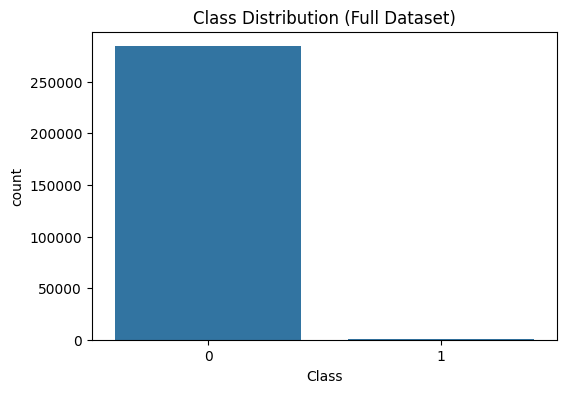

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Full Dataset)')
plt.show()

# Set up Data for Algos

In [11]:
X = df.drop(columns=['Class', 'Time'])
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
'''
STRATIFY: 
    Ensures that the class distribution in your train and test sets
    matches the class distribution in your full dataset. This helps make sure that all
    of one class isnt in just the train but not the test, it makes sure that there is 
    even distribution of the classes amongst the train and test sets. Will usually always
    be equal to y for a classification problem

    We have to do this because we can see the large variance in class value counts above

RANDOM_STATE:
    Makes sure that each iteration of the model keeps the same randomization pattern

TEST_SIZE:
    Determines what portion of the full dataset will be in the test set and the remaining will
    be in the training set
''';

# Baseline Logistic Regression Model (no class imbalance fix)

We will be using a Logistic Regression Model to test the resampling techniques throughout this notebook

In [46]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train) # Fit the model
y_pred_baseline = model.predict(X_test) # Predict the outcome 

print(f'Accuracy Score for Baseline model: {accuracy_score(y_test, y_pred_baseline)}')
print(f'F1 Score for Baseine model       : {f1_score(y_test, y_pred_baseline)}')

Accuracy Score for Baseline model: 0.9991397773954567
F1 Score for Baseine model       : 0.72


F1 Score being that low, but accuracy that high, shows the accuracy score bad data (due to class imbalance)

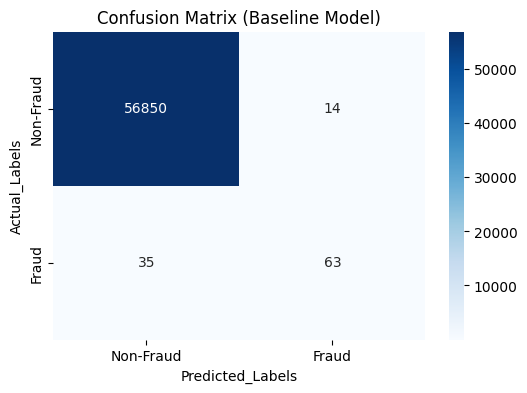

In [16]:
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (Baseline Model)')
plt.show()

In this application of fraud detection, it is more important that we err on the side of predicting fraud when it isnt actually fraud, instead of predicting not fraud then it actually is fraud. This could lead to large losses if the latter is more prevelant.

Confusion Matrix parameters explained:

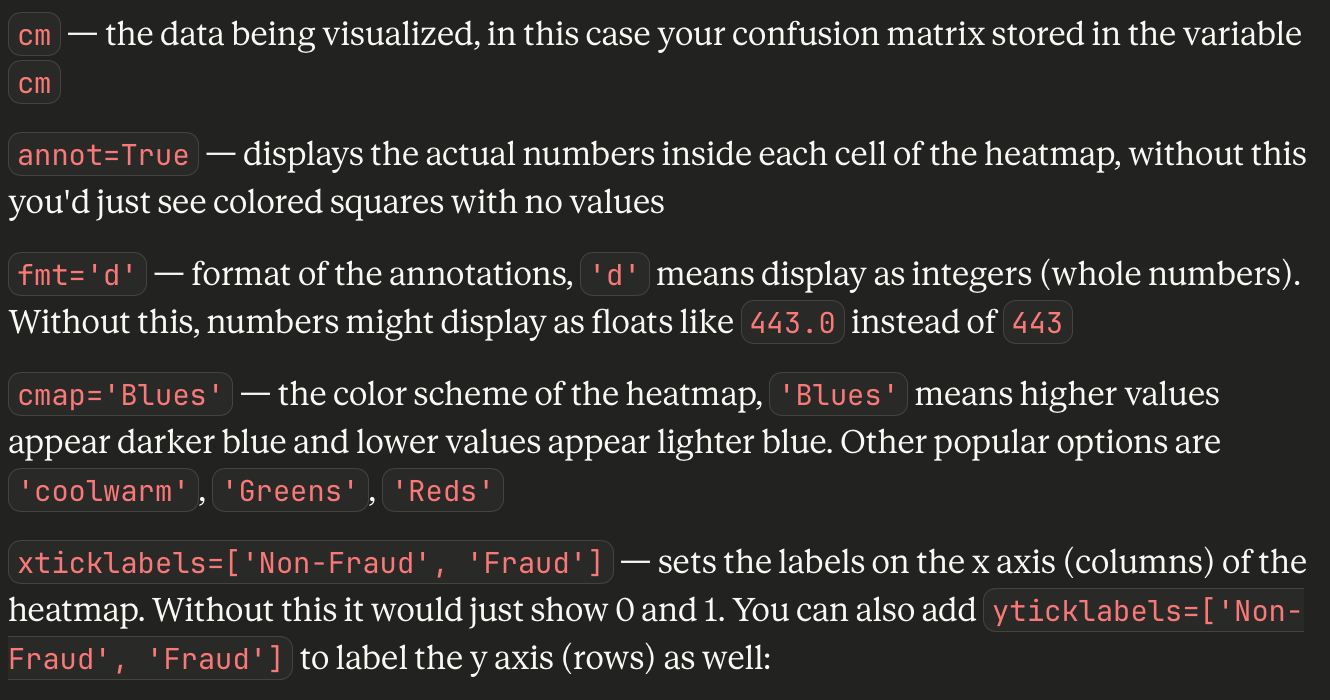

# Oversampling Techniques for the Imbalanced Class Data

#### RandomOverSampler

In [26]:
ros = RandomOverSampler(random_state=42) # Keep random_state consistent throughout project

X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train) # Resample the training data using the RandomOverSampler

print(f'Class counts using ROS Resampling: {y_resampled_ros.value_counts()}')

Class counts using ROS Resampling: Class
0    227451
1    227451
Name: count, dtype: int64


Now we can see that the classes are equal in the target feature

Fit Logistic Regression model based off the resampled data

Note that you only do the resampling for the training data, you test the new resampled model on the original test set  

In [25]:
model.fit(X_resampled_ros, y_resampled_ros)

y_pred_ros = model.predict(X_test)

print(f'Accuracy Score for RandomOverSampler Resampled Model : {accuracy_score(y_test, y_pred_ros)}')
print(f'F1 Score for RandomOverSampler Resampled Model       : {f1_score(y_test, y_pred_ros)}')

Accuracy Score for RandomOverSampler Resampled Model : 0.9746322109476493
F1 Score for RandomOverSampler Resampled Model       : 0.11076923076923077


Fit the Logistic Classifier with the resampled X and y training data (used RandomOverSampler)

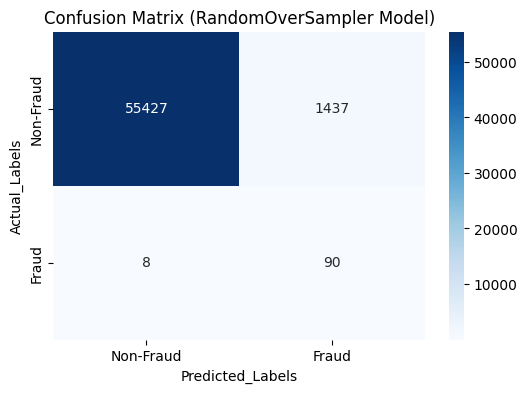

In [59]:
cm_ros = confusion_matrix(y_test, y_pred_ros)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (RandomOverSampler Model)')
plt.show()

With this Oversampling algorithm used for the resampled model, we can see the F1 score went way down. Also, there was way less fraud being predicted as no-fraud, and way more no-fraud being predicted as fraud. In this application, it could be beneficial to use this over the original due to the points made earlier about it being more important to double check predicted fraud even if it is not fraud then vice versa.

##### SMOTE (Synthetic Minority Over-Sampling Technique)

In [30]:
smote = SMOTE(random_state = 42)

X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

print(f'Class counts using SMOTE Oversampling Method: {y_resampled_smote.value_counts()}')

Class counts using SMOTE Oversampling Method: Class
0    227451
1    227451
Name: count, dtype: int64


In [29]:
model.fit(X_resampled_smote, y_resampled_smote)

y_pred_smote = model.predict(X_test)

print(f'Accuracy Score for SMOTE Oversampled Model : {accuracy_score(y_test, y_pred_smote)}')
print(f'F1 Score for SMOTE Oversampled Model       : {f1_score(y_test, y_pred_smote)}')

Accuracy Score for SMOTE Oversampled Model : 0.9811979916435518
F1 Score for SMOTE Oversampled Model       : 0.14251401120896717


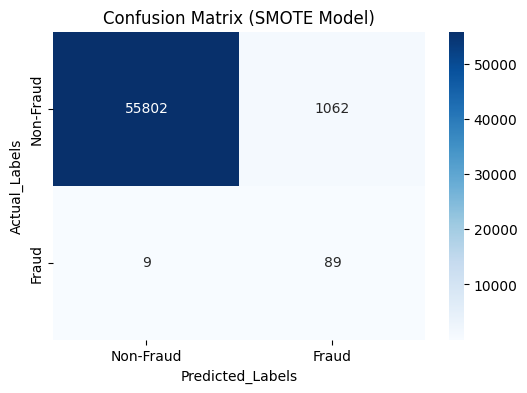

In [61]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (SMOTE Model)')
plt.show()

The SMOTE over sampling technique had 1 more non-fraud prediction for a fraud record, which is not ideal. But, the fraud predicted non-fraud records went way down. This tradeoff does seem to perform a bit better due to this.

##### ADASYN
- Uses StandardScaler preprocessing

In [32]:
adasyn = ADASYN(random_state=42)

# Scale the X Features before running ADASYN over sampling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

print(f'Class counts using ADSYN Oversampling Method: {y_resampled_adasyn.value_counts()}')

Class counts using ADSYN Oversampling Method: Class
1    227468
0    227451
Name: count, dtype: int64


In [33]:
model.fit(X_resampled_adasyn, y_resampled_adasyn)

y_pred_adasyn = model.predict(X_test_scaled)

print(f'Accuracy Score for ADASYN Oversampling Model: {accuracy_score(y_test, y_pred_adasyn)}')
print(f'F1 Score for ADASYN Oversampling Model      : {f1_score(y_test, y_pred_adasyn)}')

Accuracy Score for ADASYN Oversampling Model: 0.9143990730662547
F1 Score for ADASYN Oversampling Model      : 0.03598260181890075


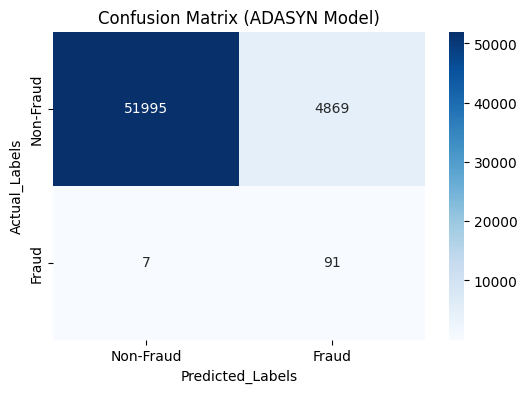

In [62]:
cm_adasyn = confusion_matrix(y_test, y_pred_adasyn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adasyn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (ADASYN Model)')
plt.show()

Using the ADASYN over sampling technique, the non-fraud predicted fraud count went down to the lowest it has been. But, the trade off is the fraud predicted non-fraud went up significantly to almost 5,000. Based on this massive jump in the false negative bucket and minor drop in the false positive bucket, I would still continue with the SMOTE over sampling technique.

# Under Sampling Techniques for Imbalanced Data

##### RandomUnderSampler

In [37]:
rus = RandomUnderSampler(random_state=42)

X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

print(f'Class counts using RandomUnderSampler Undersampling Method: {y_resampled_rus.value_counts()}')

Class counts using RandomUnderSampler Undersampling Method: Class
0    394
1    394
Name: count, dtype: int64


This technique brings the class counts way down, to make it even classes at a lower volume

In [38]:
model.fit(X_resampled_rus, y_resampled_rus)

y_pred_rus = model.predict(X_test)

print(f'Accuracy Score for RandomUnderSampler Undersampling Model: {accuracy_score(y_test, y_pred_rus)}')
print(f'F1 Score for RandomUnderSampler Undersampling Model      : {f1_score(y_test, y_pred_rus)}')

Accuracy Score for RandomUnderSampler Undersampling Model: 0.9595519820231031
F1 Score for RandomUnderSampler Undersampling Model      : 0.07246376811594203


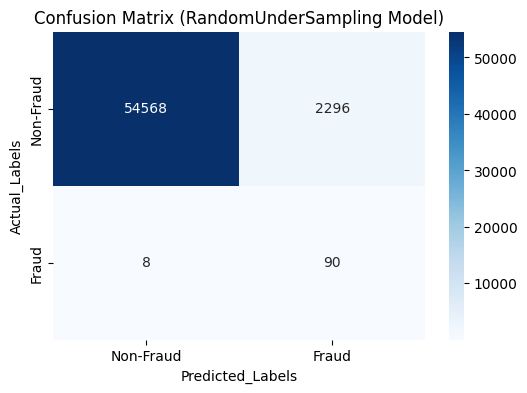

In [63]:
cm_rus = confusion_matrix(y_test, y_pred_rus)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rus, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (RandomUnderSampling Model)')
plt.show()

Based on these results, the false positive is the same count as our RandomOverSampler technique model, but the false negatives are way higher. In that case, we would not want to use this technique.

##### EditedNearestNeighbors

In [41]:
enn = EditedNearestNeighbours() # No random_state parameter for this technique

X_resampled_enn, y_resampled_enn = enn.fit_resample(X_train, y_train)

print(f'Class counts using EditedNearestNeighbours Undersampling Method: {y_resampled_enn.value_counts()}')

Class counts using EditedNearestNeighbours Undersampling Method: Class
0    227304
1       394
Name: count, dtype: int64


With this technique, it does not bring the classes to an even split. What this under sampling technique does, is it removes samples close to decision boundary. It changes classes to the nearest neighbor.

In [42]:
model.fit(X_resampled_enn, y_resampled_enn)

y_pred_enn = model.predict(X_test)

print(f'Accuracy Score for EditedNearestNeighbours Undersampling Model: {accuracy_score(y_test, y_pred_enn)}')
print(f'F1 Score for EditedNearestNeighbours Undersampling Model      : {f1_score(y_test, y_pred_enn)}')

Accuracy Score for EditedNearestNeighbours Undersampling Model: 0.9992451107756047
F1 Score for EditedNearestNeighbours Undersampling Model      : 0.7624309392265194


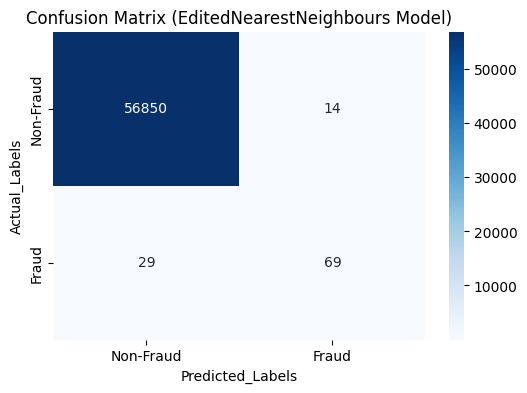

In [64]:
cm_enn = confusion_matrix(y_test, y_pred_enn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_enn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (EditedNearestNeighbours Model)')
plt.show()

Because this under sampling technique had a pretty identical class count distribution, the correlation results are pretty similar. But, compared to the baseline model, the false negatives were actually lower. Due to this, we would want to use this over the baseline model.

# Cost-Sensitive Learning for Imbalanced Data

In [66]:
model_csl = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced') # class_weight = 'balanced' makes it cost-sensitive learning

print(f'Class counts using Cost-Sensitive Learning Method: {y_train.value_counts()}') # Will be the same as baseline because no resampling methods

Class counts using Cost-Sensitive Learning Method: Class
0    227451
1       394
Name: count, dtype: int64


This technique uses the parameter 'class_weight = 'balanced' as the treatment to imbalanced data. No need to resample the trianing datasets

In [52]:
model_csl.fit(X_train, y_train)

y_pred_csl = model_csl.predict(X_test)

print(f'Accuracy Score for Cost-Sensitive Learning Model: {accuracy_score(y_test, y_pred_csl)}')
print(f'F1 Score for Cost-Sensitive Learning Model      : {f1_score(y_test, y_pred_csl)}')

Accuracy Score for Cost-Sensitive Learning Model: 0.974456655314069
F1 Score for Cost-Sensitive Learning Model      : 0.11009174311926606


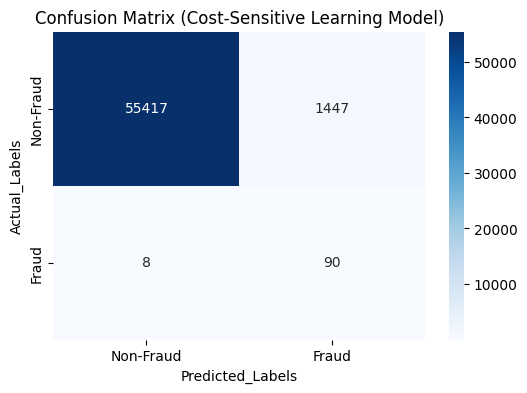

In [65]:
cm_csl = confusion_matrix(y_test, y_pred_csl)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_csl, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (Cost-Sensitive Learning Model)')
plt.show()

This confusion matrix for the Cost-Sensitive Learning model is pretty similar to the RandomOverSampling model. Therefore, we would still want to go with the SMOTE model.

# Custom Class Weights Model for Imbalanced Data

We will now try using class weights for the two classes

In [67]:
class_weights = {0: 1, 1: 10}

model_class_weights = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weights)

print(f'Class counts using Custom Class Weights Method: {y_train.value_counts()}')

Class counts using Custom Class Weights Method: Class
0    227451
1       394
Name: count, dtype: int64


In [68]:
model_class_weights.fit(X_train, y_train)

y_pred_class_weights = model.predict(X_test)

print(f'Accuracy Score for Custom Class Weights Model: {accuracy_score(y_test, y_pred_class_weights)}')
print(f'F1 Score for Custom Class Weights Model      : {f1_score(y_test, y_pred_class_weights)}')

Accuracy Score for Custom Class Weights Model: 0.9991397773954567
F1 Score for Custom Class Weights Model      : 0.72


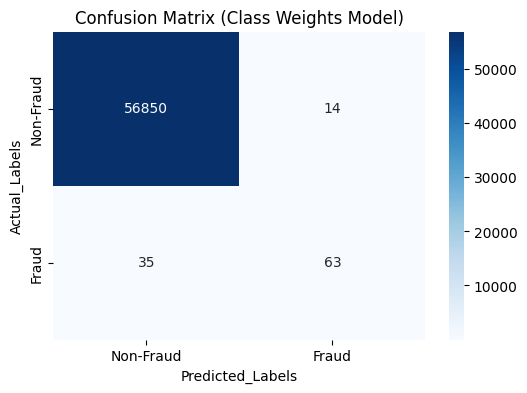

In [70]:
cm_class_weights = confusion_matrix(y_test, y_pred_class_weights)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_class_weights, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (Class Weights Model)')
plt.show()

This model actually returned us our best results, with the false negatives being lower than the baseline model, a little bit higher than the SMOTE model. But, on the flipside, the false positives were way lower than the baseline model and SMOTE model.

Now that we have tested all of the imbalanced data methods, we have come down to the SMOTE over sampling method and the Custom Class Weights method. If the stakeholder would prefer the false negatives (predicting non-fraud when it is fraud), then we would want to use the SMOTE method. If the difference between 7 and 29 false negatives is not a big deal, then we would definitely want to use the EditedNearestNeighbours method becuase it has significantly better results outside of the false negatives (only 14 false positives).

##### Export the confusion matrixes and the class distribution plots as PNGs

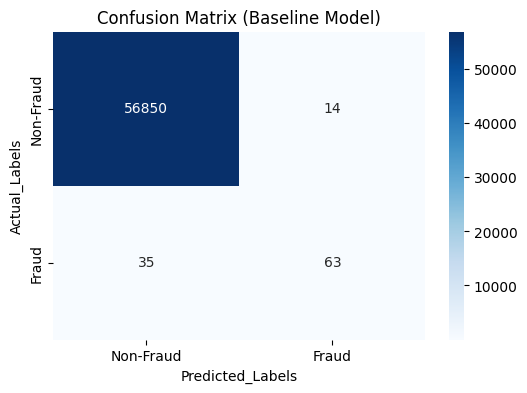

In [75]:
# Baseline Model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix (Baseline Model)')
plt.savefig('baseline_model_confusion_maxtrix.png', dpi=300, bbox_inches='tight')

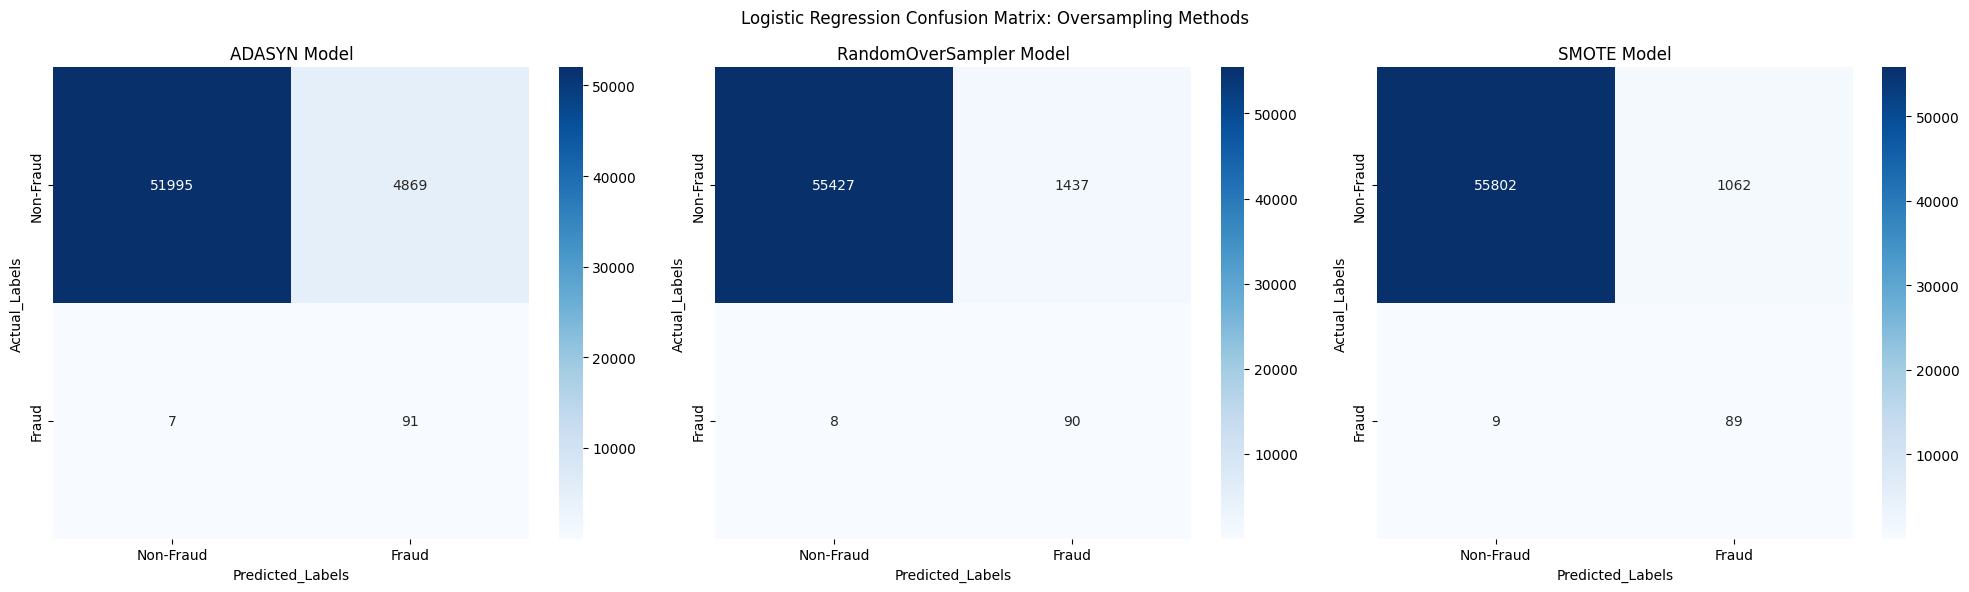

In [92]:
# Oversampling Models
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_adasyn, ax=axes[0], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_xlabel('Predicted_Labels')
axes[0].set_ylabel('Actual_Labels')
axes[0].set_title('ADASYN Model')

sns.heatmap(cm_ros, ax=axes[1], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_xlabel('Predicted_Labels')
axes[1].set_ylabel('Actual_Labels')
axes[1].set_title('RandomOverSampler Model')

sns.heatmap(cm_smote, ax=axes[2], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[2].set_xlabel('Predicted_Labels')
axes[2].set_ylabel('Actual_Labels')
axes[2].set_title('SMOTE Model')

plt.suptitle('Logistic Regression Confusion Matrix: Oversampling Methods')
plt.tight_layout()
plt.savefig('oversampling_model_confusion_maxtrix.png', dpi=300, bbox_inches='tight')
plt.show()

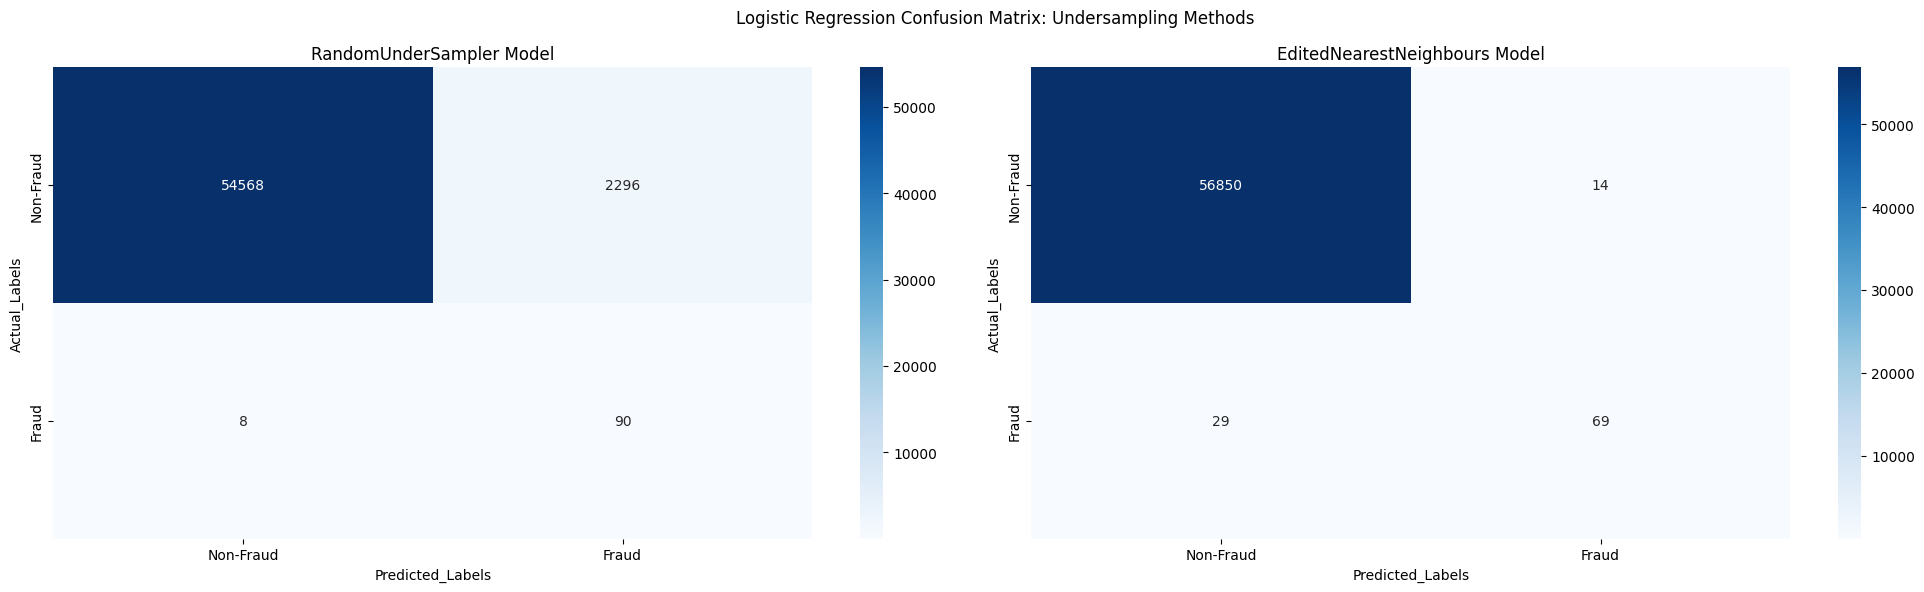

In [91]:
# Undersampling Models
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(cm_rus, ax=axes[0], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_xlabel('Predicted_Labels')
axes[0].set_ylabel('Actual_Labels')
axes[0].set_title('RandomUnderSampler Model')

sns.heatmap(cm_enn, ax=axes[1], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_xlabel('Predicted_Labels')
axes[1].set_ylabel('Actual_Labels')
axes[1].set_title('EditedNearestNeighbours Model')

plt.suptitle('Logistic Regression Confusion Matrix: Undersampling Methods')
plt.tight_layout()
plt.savefig('undersampling_model_confusion_maxtrix.png', dpi=300, bbox_inches='tight')
plt.show()

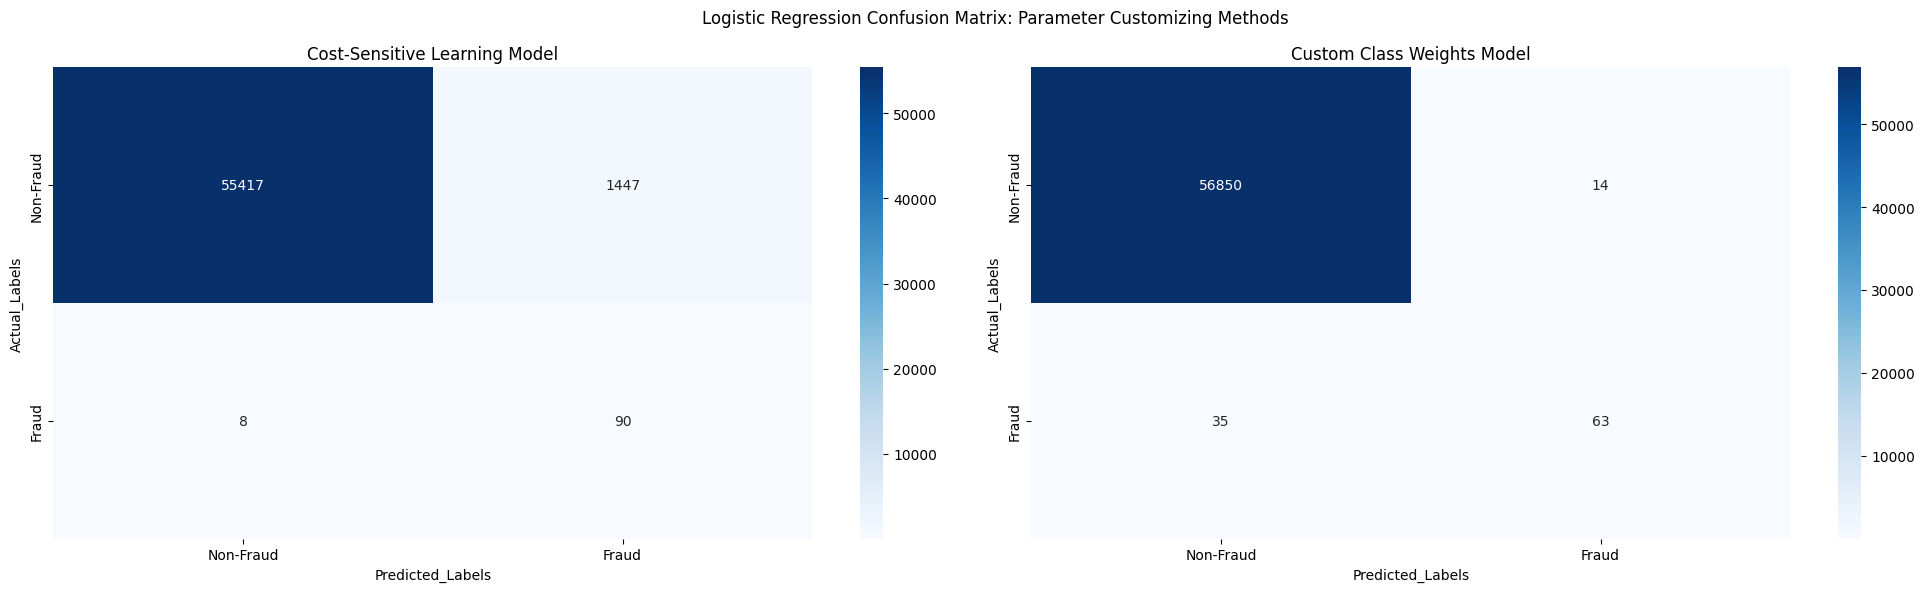

In [93]:
# Specific Parameter Models
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(cm_csl, ax=axes[0], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_xlabel('Predicted_Labels')
axes[0].set_ylabel('Actual_Labels')
axes[0].set_title('Cost-Sensitive Learning Model')

sns.heatmap(cm_class_weights, ax=axes[1], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_xlabel('Predicted_Labels')
axes[1].set_ylabel('Actual_Labels')
axes[1].set_title('Custom Class Weights Model')

plt.suptitle('Logistic Regression Confusion Matrix: Parameter Customizing Methods')
plt.tight_layout()
plt.savefig('parameter_customizing_model_confusion_maxtrix.png', dpi=300, bbox_inches='tight')
plt.show()

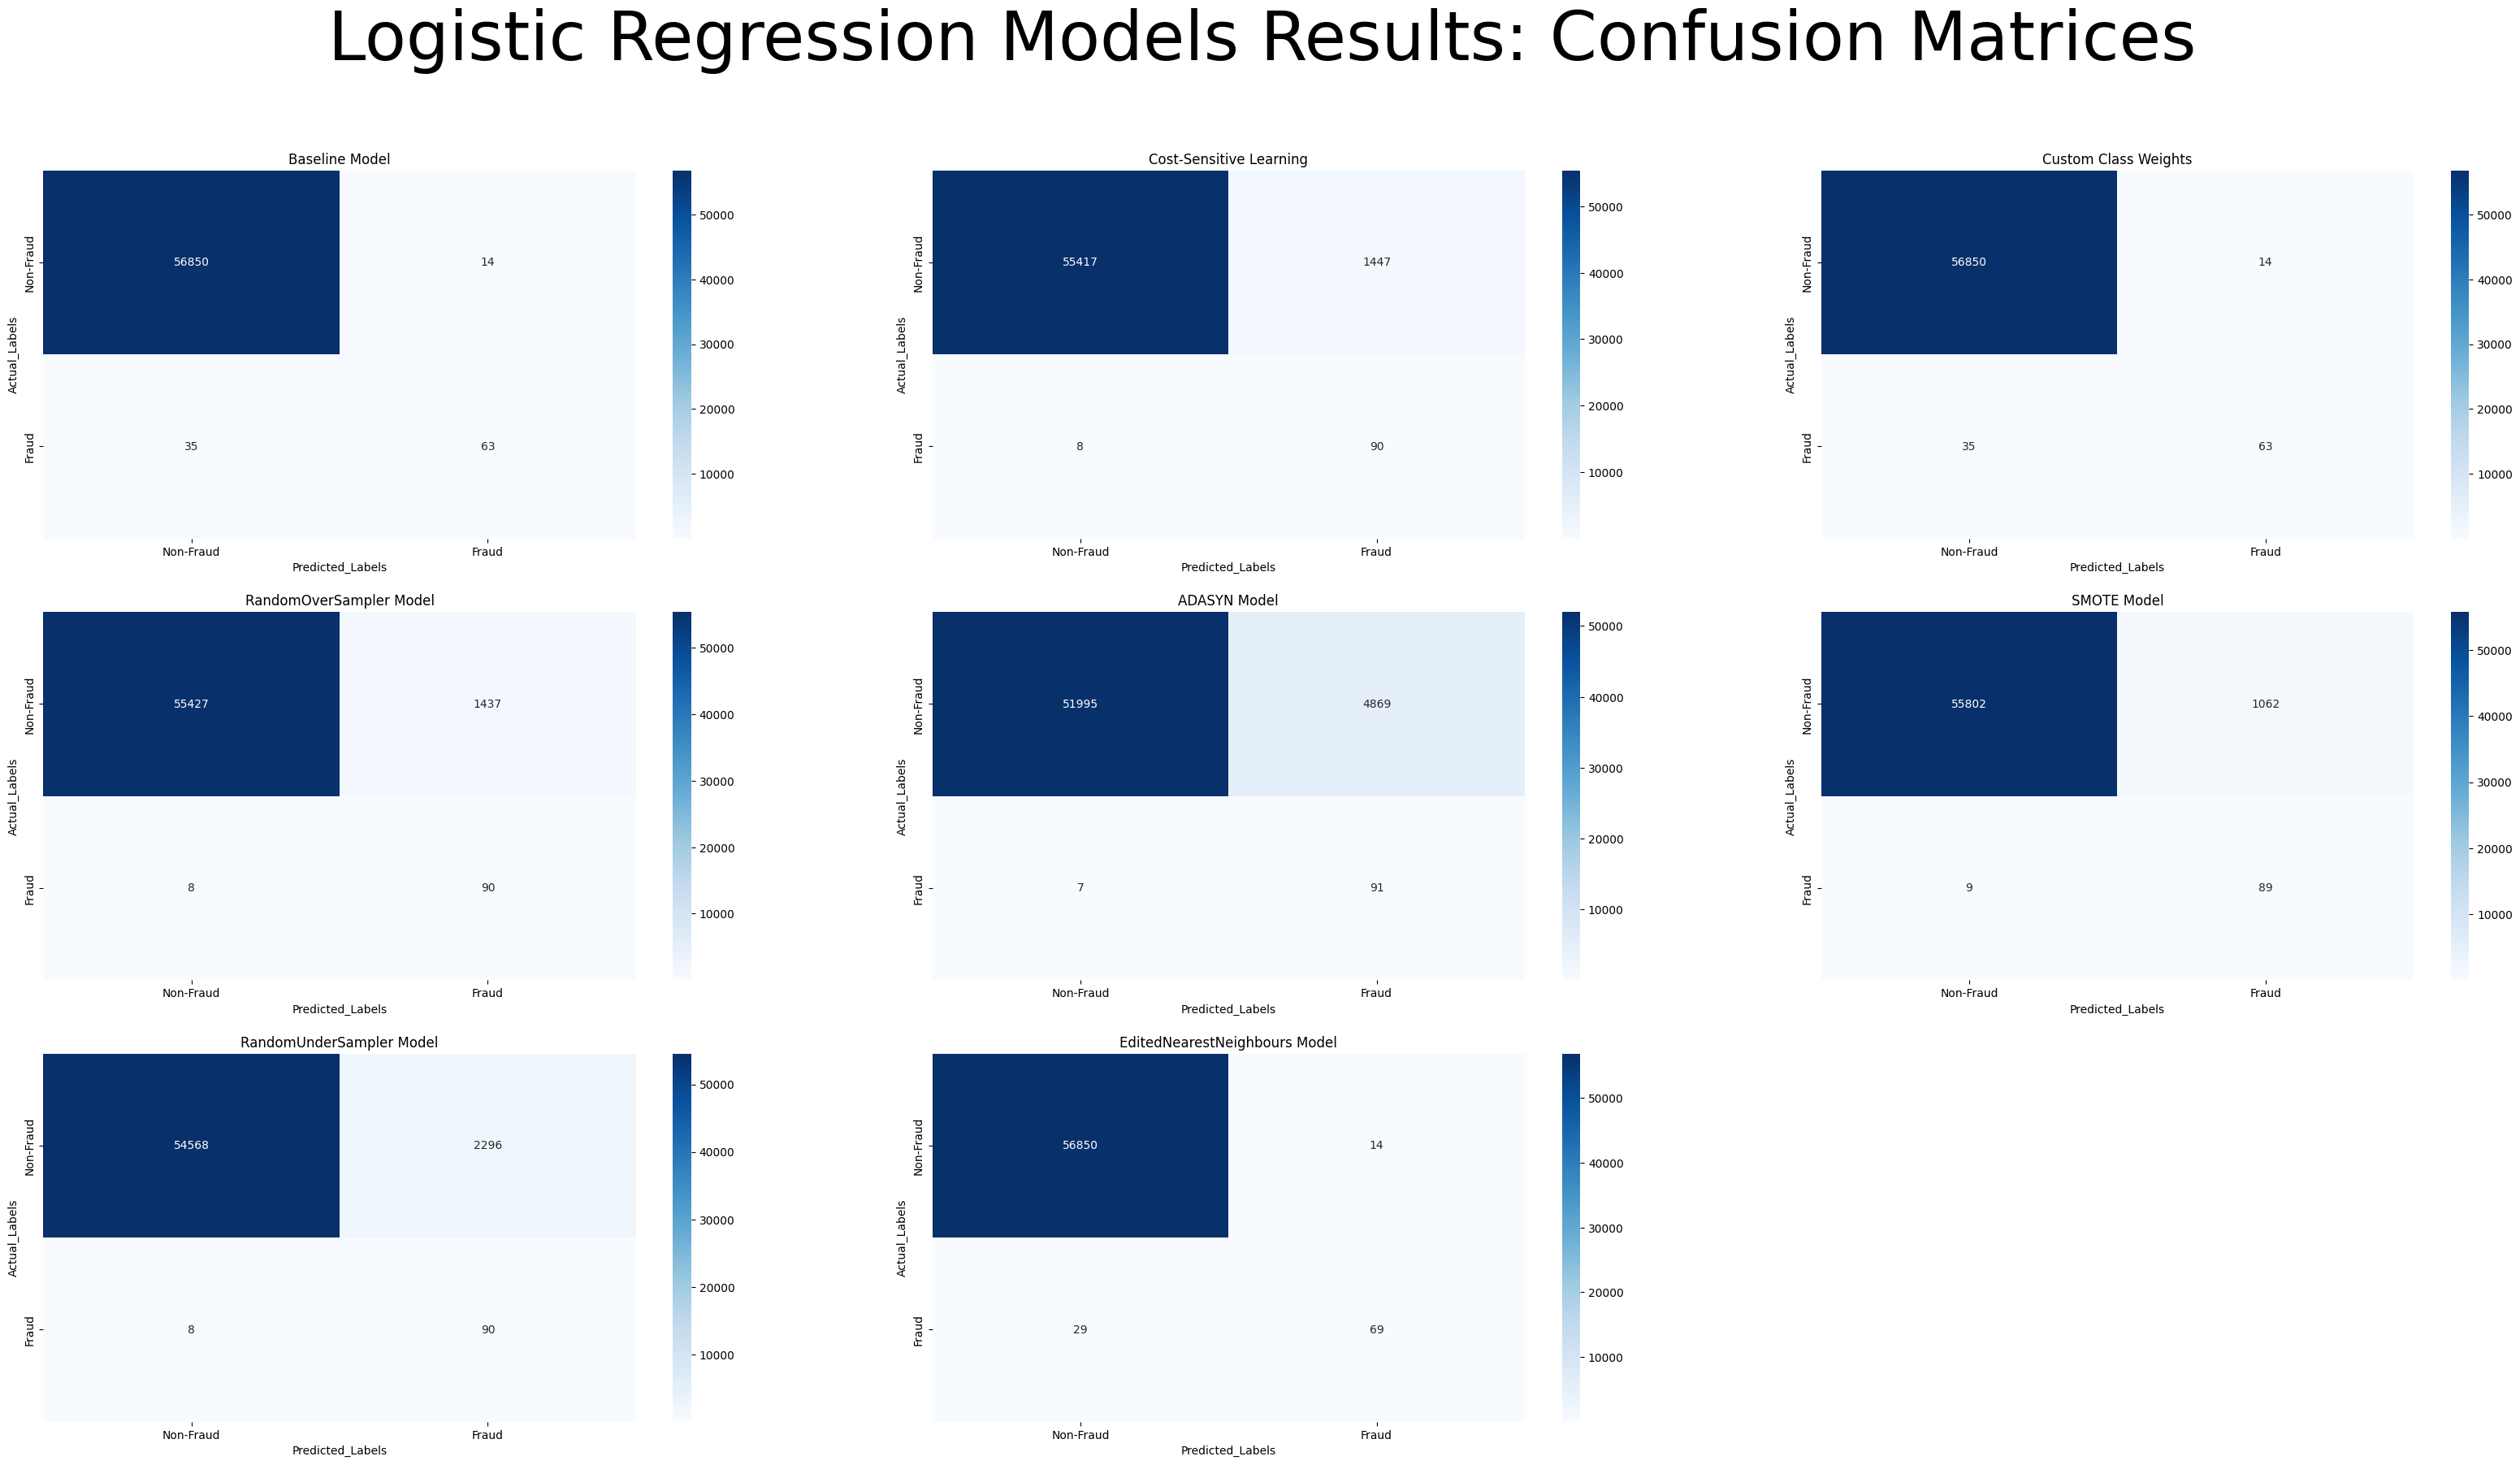

In [114]:
# Put all of them onto one PDF
fig, axes = plt.subplots(3, 3, figsize=(40, 20))

# Flatten the 2D axes array into 1D for easy indexing
axes = axes.flatten()

sns.heatmap(cm_baseline, ax=axes[0], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_xlabel('Predicted_Labels')
axes[0].set_ylabel('Actual_Labels')
axes[0].set_title('Baseline Model')

sns.heatmap(cm_csl, ax=axes[1], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_xlabel('Predicted_Labels')
axes[1].set_ylabel('Actual_Labels')
axes[1].set_title('Cost-Sensitive Learning')

sns.heatmap(cm_class_weights, ax=axes[2], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[2].set_xlabel('Predicted_Labels')
axes[2].set_ylabel('Actual_Labels')
axes[2].set_title('Custom Class Weights')

sns.heatmap(cm_ros, ax=axes[3], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[3].set_xlabel('Predicted_Labels')
axes[3].set_ylabel('Actual_Labels')
axes[3].set_title('RandomOverSampler Model')

sns.heatmap(cm_adasyn, ax=axes[4], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[4].set_xlabel('Predicted_Labels')
axes[4].set_ylabel('Actual_Labels')
axes[4].set_title('ADASYN Model')

sns.heatmap(cm_smote, ax=axes[5], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[5].set_xlabel('Predicted_Labels')
axes[5].set_ylabel('Actual_Labels')
axes[5].set_title('SMOTE Model')

sns.heatmap(cm_rus, ax=axes[6], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[6].set_xlabel('Predicted_Labels')
axes[6].set_ylabel('Actual_Labels')
axes[6].set_title('RandomUnderSampler Model')

sns.heatmap(cm_enn, ax=axes[7], annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[7].set_xlabel('Predicted_Labels')
axes[7].set_ylabel('Actual_Labels')
axes[7].set_title('EditedNearestNeighbours Model')

axes[8].set_visible(False)

plt.suptitle('Logistic Regression Models Results: Confusion Matrices', fontsize=60)
plt.tight_layout
plt.savefig('all_model_confusion_matrices.png', dpi=300)
plt.show()